## Solución del problema

### 1.Instalación e importación de librerias

In [1]:
"""# Manejo de gráficas
!pip install scikit-plot
# Manejo de gráficas
!pip install scikit-plot
#Manejo de lemmatization spanish
!pip install stanza
#!{sys.executable} -m pip install pandas-profiling
"""
#Solo ejecutar si no se tiene instalado

'# Manejo de gráficas\n!pip install scikit-plot\n# Manejo de gráficas\n!pip install scikit-plot\n#Manejo de lemmatization spanish\n!pip install stanza\n#!{sys.executable} -m pip install pandas-profiling\n'

In [2]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ascas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#El lemmatizer de NLTK NO funciona en español, por lo que se usará el de Stanza
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
#nltk.download('wordnet')
import stanza
stanza.download('es') # descarga el modelo de lematización en español


2024-04-06 19:29:06 INFO: Downloaded file to C:\Users\ascas\stanza_resources\resources.json
2024-04-06 19:29:06 INFO: Downloading default packages for language: es (Spanish) ...
2024-04-06 19:29:08 INFO: File exists: C:\Users\ascas\stanza_resources\es\default.zip
2024-04-06 19:29:13 INFO: Finished downloading models and saved to C:\Users\ascas\stanza_resources


In [4]:
nlp = stanza.Pipeline(lang='es', processors='tokenize,mwt,pos,lemma')

2024-04-06 19:29:13 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-04-06 19:29:13 INFO: Downloaded file to C:\Users\ascas\stanza_resources\resources.json
2024-04-06 19:29:14 INFO: Loading these models for language: es (Spanish):
| Processor | Package         |
-------------------------------
| tokenize  | ancora          |
| mwt       | ancora          |
| pos       | ancora_charlm   |
| lemma     | ancora_nocharlm |

2024-04-06 19:29:14 INFO: Using device: cpu
2024-04-06 19:29:14 INFO: Loading: tokenize
2024-04-06 19:29:16 INFO: Loading: mwt
2024-04-06 19:29:16 INFO: Loading: pos
2024-04-06 19:29:16 INFO: Loading: lemma
2024-04-06 19:29:16 INFO: Done loading processors!


In [5]:

import pandas as pd
import numpy as np
import sys

#Usados en el proyecto 1
from nltk.tokenize import WordPunctTokenizer 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
######################################

import re, string, unicodedata

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt

### 2. Perfilamiento y entendimiento de los datos

In [6]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('train_reviews.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
data_train=data

In [7]:
data_train

,Review,Class
0,Muy buena atención y aclaración de dudas por p...,5
1,Buen hotel si están obligados a estar cerca de...,3
2,"Es un lugar muy lindo para fotografías, visite...",5
3,Abusados con la factura de alimentos siempre s...,3
4,Tuvimos un par de personas en el grupo que rea...,3
...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4
7871,"Fue una escapada de un día desde el complejo, ...",4
7872,La Plaza de la Revolución es un lugar emblemát...,3
7873,Es la segunda ocasión que me quedo en los cuar...,1


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


#### 2. Entendimiento de los datos

In [9]:
from scipy import stats as st

textos = data_train.copy()
textos['Conteo'] = [len(x) for x in textos['Review']]

#Por ahora: La moda no da información relevante
"""def moda(textos):
    for i in textos['Review']: 
        dict = {}
        for x in i.split(' '): 
            print(i)
        
            if x in dict.keys():
                dict[x] += 1
            else:
                dict[x] = 1

        max_key = max(dict, key=dict.get)
        print(max_key)


moda(textos)
"""

#Max tiene el máximo tamaño de la palabra
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
#Max tiene el minimo tamaño de la palabra
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
textos['len'] = [len(i)  for i in textos['Review']]

def frecuenciaPalabras(texto):
    frecuenciaPalabras = {}

    for i in texto: 
        for x in i.split(' '): 
            if x in frecuenciaPalabras.keys():
                frecuenciaPalabras[x] += 1
            else:
                frecuenciaPalabras[x] = 1

    print(frecuenciaPalabras)
    return frecuenciaPalabras



##### Obtención de las palabras más frecuentes 
A través de este análisis se obtienen las palabras más frecuentes en todos los reviews previo al procesamiento de los mismos

In [10]:
dictFrec = frecuenciaPalabras(textos['Review'])

df_Frecuencias = pd.DataFrame.from_dict(dictFrec, orient='index', columns=['frecuencia'])

df_Frecuencias['palabra'] = df_Frecuencias.index
df_Frecuencias.reset_index(drop=True,inplace=True)

df_Frecuencias['palabra']=[unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in df_Frecuencias['palabra']]

{'Muy': 461, 'buena': 958, 'atención': 602, 'y': 18843, 'aclaración': 1, 'de': 25036, 'dudas': 31, 'por': 4448, 'parte': 527, 'la': 17275, 'señorita': 30, 'Verónica': 1, 'castillo,': 21, 'atenta': 19, 'amable': 258, 'en': 13617, 'cuestión': 27, 'laborable.': 1, '': 3487, 'Ideal': 17, 'para': 6006, 'descansar': 56, 'muy': 5850, 'buenas': 197, 'habitaciónes,': 1, 'limpieza,': 40, 'ordenadas.': 1, 'Buena': 86, 'comida': 1761, 'del': 4051, 'restaurante,variedad': 1, 'comidas': 87, 'Buen': 89, 'hotel': 2641, 'si': 1558, 'están': 534, 'obligados': 5, 'a': 8410, 'estar': 359, 'cerca': 338, 'centro': 398, 'convenciones,': 3, 'pero': 3398, 'el': 13145, 'restaurante': 804, 'necesita': 86, 'mejorar!': 1, 'Frío': 1, 'café': 140, 'flojo': 6, '-': 548, 'un': 8052, 'montón': 246, 'pan': 51, 'personas': 435, 'que': 15619, 'sirve': 60, 'unos': 373, 'uderstanding': 1, 'bu': 1, 'lo': 3650, 'significa': 22, 'servicio.': 127, 'En': 717, 'este': 1612, 'barrio': 43, 'con': 5311, 'tan': 509, 'pocas': 78, 'opc

Vemos las palabras más frecuentes en el siguiente gráfico

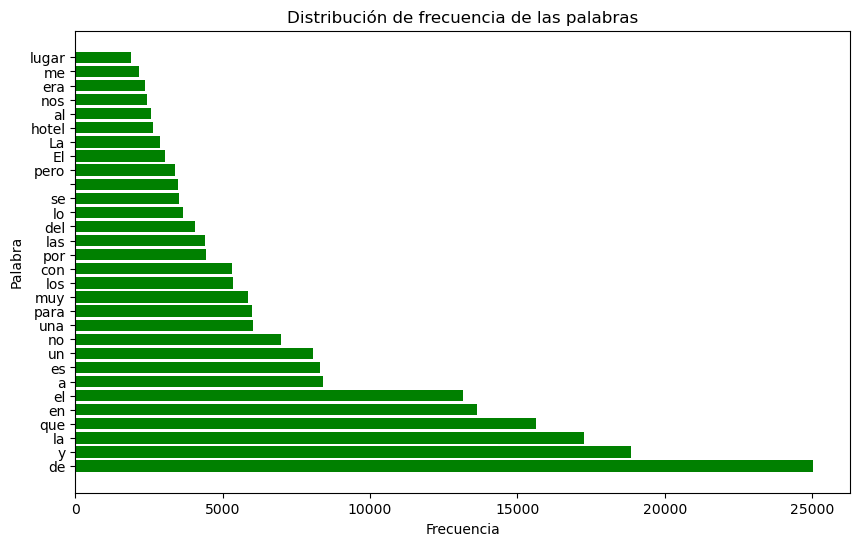

In [11]:
sortedFirst = df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).head(30)



fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst['palabra'], sortedFirst['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

Vemos las palabras menos frecuentes en el siguiente gráfico

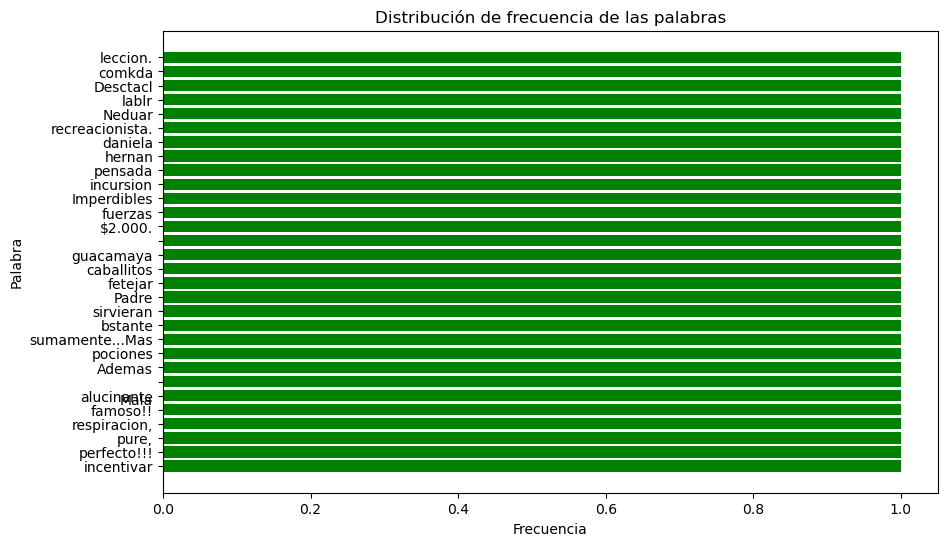

In [12]:
sortedLast= df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).tail(30)

fig2 = plt.figure(figsize=(10, 6))
plt.barh(sortedLast['palabra'], sortedLast['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

In [13]:
textos

,Review,Class,Conteo,Max,Min,len
0,Muy buena atención y aclaración de dudas por p...,5,252,20,0,252
1,Buen hotel si están obligados a estar cerca de...,3,297,13,1,297
2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1,104
3,Abusados con la factura de alimentos siempre s...,3,422,14,1,422
4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1,419
...,...,...,...,...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4,113,11,2,113
7871,"Fue una escapada de un día desde el complejo, ...",4,261,12,2,261
7872,La Plaza de la Revolución es un lugar emblemát...,3,777,14,1,777
7873,Es la segunda ocasión que me quedo en los cuar...,1,651,12,0,651


In [14]:
import ydata_profiling
from ydata_profiling import ProfileReport
ProfileReport(textos)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### 2.2 Preparación de los datos

##### 2.2.1 Limpieza de los datos

##### 2.2.1.1 Duplicados

In [15]:
textos.duplicated(keep = False).sum()

102

In [16]:
textos.drop_duplicates(keep='first', inplace=True)
textos.duplicated(keep = False).sum()

0

##### 2.2.1.2 Eliminación de números
Se hace uso de expresiones regulares con el objetivo de eliminar los diferentes formates de números que se pueden encontrar en el texto. 

In [17]:
#Quitar los números
print(textos['Review'][1201])
textos['Review'] = textos['Review'].replace(r'\d+,\d+', '', regex=True)
textos['Review'] = textos['Review'].replace(r'\d+', '', regex=True)
textos['Review'] = textos['Review'].replace(r'\d+.\d+', '', regex=True)
print(textos['Review'][1201])

El día lunes 17 de setiembre 2012 visite con mi familia Monserratte y debía pagar un taxi, por lo que a las 12 M.D, fui a la taquilla para cambiar 50,000 pesos y poder pagar mi taxi. Mi sorpresa al pagar el taxi fue que le entregue los 50,000 al empleado en la taquilla y me estafó, me dió un billete de 20,000 encima y debajo venia uno de 2,000 y luego el otro de 1,000.  El funcionario de la taquilla me estafó con el cambio y se dejó 27,000 pesos. Es bueno que sepan que tienen un ladrón trabajando en sus instalaciones y así como fui estafado yo, me imagino que también otros Turistas pasan por lo mismo. Revise muy bien su cambio en la ventanilla porque le pordría pasar lo mismo.
El día lunes  de setiembre  visite con mi familia Monserratte y debía pagar un taxi, por lo que a las  M.D, fui a la taquilla para cambiar  pesos y poder pagar mi taxi. Mi sorpresa al pagar el taxi fue que le entregue los  al empleado en la taquilla y me estafó, me dió un billete de  encima y debajo venia uno de 

Se definen rutinas de preprocesamiento que se recopilan en la rutina preprocessing() y softPreprocessing(), la segunda rutina se aplica previo a la aplicación de lemmatización con el fin de obtener mejores resultados y tras lemmatizar si se aplica preprocessing()

In [18]:
spanish_stopwords = stopwords.words('spanish')
print(spanish_stopwords)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words
    

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

#def replace_numbers(words):
#    """Replace all interger occurrences in list of tokenized words with textual representation"""
#    p = inflect.engine()
#    print(words)
#    new_words = []
#    for word in words:
#        if word.isdigit():
#            new_word = p.number_to_words(word)
#            new_words.append(new_word)
#            print("if " + new_word)
#        else:
#            new_words.append(word)
#    return new_words

def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in spanish_stopwords:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
 #   words = replace_numbers(words)
    words = remove_punctuation(words)
#    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

def getString(list): 
    string = ""
    for w in list: 
        string += w + " "
    return string



def softPreprocessing(words):
    words = to_lowercase(words)
    words = remove_non_ascii(words)
    getString(words)
    return getString(words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

##### 2.2.1.3 SoftPreprocessing
Aplicación de softpreprocessing para poder ejecutar el lemmatizer(), en esto lo único que se hace es dejar todas las palabras en minusculas y eliminar caracteres no ascii para que lemmatizer de Stanza no se confunda

In [19]:
textos['tokens'] = [i.split(' ') for i in textos['Review']]
textos['tokens'] = textos['tokens'].apply(softPreprocessing)#Se aplica un preprocesamiento muy tranqui

textos.iloc[1201]['tokens']

'lugar especial para un atardecer o para conocer como son los cubanos y cubanas, autentico y romantico. inicio y fin de muchas cosas: el amor, la aventura, la ciudad y el mar. '

##### 2.2.2 Lemmatizer - Normalización
Se aplica un lemmatizer que transforma el texto en su lema (sujeto + verbo + predicado), esto permite por un lado reducir las palabras relevantes similares y por otro lado se obtiene una mejor puntuación respecto a no aplicarlo. Esta prueba de que daba mejor se explica mejor en el documento. 

Cabe resaltar que el Lemmatizer se demora ejecuntado un aproximado de 1h 20 min por esa razón se comenta y se guarda ese archivo en el csv lemaSoftProcessing.csv para posteriormente recuperarlo sin necesidad de ejeutarlo de nuevo. 


In [20]:
"""def lemmatizer(row):

    review= row['tokens']
    
    print(row.name)
    doc  =  nlp(review)
    #print (review)
    lemma = [[word.lemma for word in sent.words]  for sent in doc.sentences]
    finalLemma =[]
    for sent in lemma:
        for word in sent:  
            finalLemma.append(word)
    #print(finalLemma)

    return finalLemma


textos['tokens']= textos.apply(lemmatizer,axis=1) #Aplica la lematización

#Codigo para guardar los lemas en csv
textos.to_csv('lemaSoftProcessing.csv')"""


"def lemmatizer(row):\n\n    review= row['tokens']\n    \n    print(row.name)\n    doc  =  nlp(review)\n    #print (review)\n    lemma = [[word.lemma for word in sent.words]  for sent in doc.sentences]\n    finalLemma =[]\n    for sent in lemma:\n        for word in sent:  \n            finalLemma.append(word)\n    #print(finalLemma)\n\n    return finalLemma\n\n\ntextos['tokens']= textos.apply(lemmatizer,axis=1) #Aplica la lematización\n\n#Codigo para guardar los lemas en csv\ntextos.to_csv('lemaSoftProcessing.csv')"

In [21]:

from ast import literal_eval
textosLemas = pd.read_csv('lemaSoftProcessing.csv', sep=',', encoding = 'utf-8')
textosLemas.iloc[1201]
textosLemas['tokens'] = textosLemas['tokens'].apply(literal_eval)
#print(textosLemas['tokens'][1201])
"""print(textos.iloc[1201]['tokens'])

print(textos.iloc[1201]['tokens'])"""
def getString(list): 

    string = ""
    for w in list: 
        
        string += w + " "
    #print(string)
    return string
textosLemas['tokens'] = textosLemas['tokens'].apply(getString)
print(textosLemas['tokens'])

0       mucho buen atencion y aclaracion de duda por p...
1       buen hotel si estar obligado a estar cerca de ...
2       ser uno lugar mucho lindo para fotografia , vi...
3       abusado con el factura de alimento siempre él ...
4       tener uno par de persona en el grupo que realm...
                              ...                        
7797    yo parecer buen sistema , agilizar el transpor...
7798    ser uno escapada de uno dia desde el complejo ...
7799    el plaza de el revolucion ser uno lugar emblem...
7800    ser el segundo ocasion que yo quedar en el cua...
7801    llegar por casualidad a el mercader , uno grup...
Name: tokens, Length: 7802, dtype: object


#### 2.2.3 Tokenización

Se utiliza WordPunctTokenizer dado que el idioma español no presenta contracciones y este Tokenizer es más robusto frente a los signos de puntuación. 

In [22]:

textosLemas['tokens'] = [ WordPunctTokenizer().tokenize(i) for i in textosLemas['tokens']]
    
textosLemas['tokens'].iloc[1201]

['lugar',
 'especial',
 'para',
 'uno',
 'atardecer',
 'o',
 'para',
 'conocer',
 'como',
 'ser',
 'el',
 'cubano',
 'y',
 'cubano',
 ',',
 'autentico',
 'y',
 'romantico',
 '.',
 'inicio',
 'y',
 'fin',
 'de',
 'mucho',
 'cosa',
 ':',
 'el',
 'amor',
 ',',
 'el',
 'aventura',
 ',',
 'el',
 'ciudad',
 'y',
 'el',
 'mar',
 '.']

In [23]:
textosLemas['tokens'].dropna()

0       [mucho, buen, atencion, y, aclaracion, de, dud...
1       [buen, hotel, si, estar, obligado, a, estar, c...
2       [ser, uno, lugar, mucho, lindo, para, fotograf...
3       [abusado, con, el, factura, de, alimento, siem...
4       [tener, uno, par, de, persona, en, el, grupo, ...
                              ...                        
7797    [yo, parecer, buen, sistema, ,, agilizar, el, ...
7798    [ser, uno, escapada, de, uno, dia, desde, el, ...
7799    [el, plaza, de, el, revolucion, ser, uno, luga...
7800    [ser, el, segundo, ocasion, que, yo, quedar, e...
7801    [llegar, por, casualidad, a, el, mercader, ,, ...
Name: tokens, Length: 7802, dtype: object

#### 2.2.4 Eliminación de ruido
Esta eliminación del ruido implica eliminar aquello asociado a mayusculas, eliminación de puntuación y de elementos NO ascii una vez se ha procesado el texto mediante Stanza. De igual manera uno de los pasos más fundamentales de eliminación de ruido implica eliminar las stop words que no sirven para el modelo 

In [24]:
textosLemas['tokens']=textosLemas['tokens'].apply(preprocessing) #Aplica la eliminación del ruido

textosLemas.head()

,Unnamed: 0,Review,Class,Conteo,Max,Min,tokens
0,0,Muy buena atención y aclaración de dudas por p...,5,252,20,0,"[buen, atencion, aclaracion, duda, parte, seno..."
1,1,Buen hotel si están obligados a estar cerca de...,3,297,13,1,"[buen, hotel, si, obligado, cerca, centro, con..."
2,2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1,"[ser, lugar, lindo, fotografia, visitar, selin..."
3,3,Abusados con la factura de alimentos siempre s...,3,422,14,1,"[abusado, factura, alimento, siempre, echar, c..."
4,4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1,"[tener, par, persona, grupo, realmente, querer..."


In [25]:
textosLemas['tokens'] = textosLemas['tokens'].apply(lambda x: ' '.join(map(str, x)))
textosLemas.head()

,Unnamed: 0,Review,Class,Conteo,Max,Min,tokens
0,0,Muy buena atención y aclaración de dudas por p...,5,252,20,0,buen atencion aclaracion duda parte senorita v...
1,1,Buen hotel si están obligados a estar cerca de...,3,297,13,1,buen hotel si obligado cerca centro convención...
2,2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1,ser lugar lindo fotografia visitar selina musi...
3,3,Abusados con la factura de alimentos siempre s...,3,422,14,1,abusado factura alimento siempre echar culpa i...
4,4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1,tener par persona grupo realmente querer comer...


#### 2.2.5 Normalización

En este caso solo se presenta el stemming para demostrar que feu un paso que se implementó en el análisis sin embargo se prefiere dejar el lemmatizer ya que el alogritmo es mucho más robusto y no se pierde el significado de las palabras

In [26]:
"""stemmer = SnowballStemmer('spanish')

textos['tokens'] =  [ [stemmer.stem(word) for word in tokens] for tokens in textos['tokens']]
i = 1201
print(textos['tokens'][i])
print(textos['Review'][i])"""

"stemmer = SnowballStemmer('spanish')\n\ntextos['tokens'] =  [ [stemmer.stem(word) for word in tokens] for tokens in textos['tokens']]\ni = 1201\nprint(textos['tokens'][i])\nprint(textos['Review'][i])"

### 3. División en conjuntos train y test y validación
Se divide el conjunto de datos en train y test. El train se subdivide en  train y validation (val). 

In [27]:

x_train, x_test = train_test_split(textosLemas, test_size=0.45, random_state=1) 
print(x_train.shape, x_test.shape)
x_train_completo = x_train
x_train, x_val = train_test_split(x_train, test_size=0.25, random_state=1)

print( x_test.shape,x_train.shape, x_val.shape)


(4291, 7) (3511, 7)
(3511, 7) (3218, 7) (1073, 7)


#### 3.1 Segundo profile tras aplicación de preprocessing

In [28]:
"""import ydata_profiling
from ydata_profiling import ProfileReport
ProfileReport(textosLemas)"""

'import ydata_profiling\nfrom ydata_profiling import ProfileReport\nProfileReport(textosLemas)'

In [29]:

dictFrecuenciasTokenizado = frecuenciaPalabras(textosLemas['tokens'])

df_Frecuencias = pd.DataFrame.from_dict(dictFrecuenciasTokenizado, orient='index', columns=['frecuencia'])

df_Frecuencias['palabra'] = df_Frecuencias.index
df_Frecuencias.reset_index(drop=True,inplace=True)


df_Frecuencias['palabra']=[unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in df_Frecuencias['palabra']]

{'buen': 3514, 'atencion': 869, 'aclaracion': 2, 'duda': 363, 'parte': 632, 'senorita': 32, 'veronico': 1, 'castillo': 125, 'atento': 316, 'amable': 597, 'cuestion': 33, 'laborable': 1, 'ideal': 98, 'descansar': 108, 'habitación': 1151, 'limpieza': 263, 'ordenado': 37, 'comida': 2266, 'restaurante': 1586, 'variedad': 225, 'hotel': 3970, 'si': 2437, 'obligado': 154, 'cerca': 411, 'centro': 494, 'convención': 13, 'necesitar': 287, 'mejorar': 175, 'frio': 143, 'cafe': 264, 'flojo': 13, 'monton': 251, 'pan': 66, 'persona': 736, 'servir': 270, 'uderstanding': 1, 'bu': 1, 'significar': 41, 'servicio': 2204, 'barrio': 66, 'opción': 187, 'deber': 700, 'ser': 17667, 'especial': 274, 'lugar': 2755, 'lindo': 298, 'fotografia': 65, 'visitar': 920, 'selina': 2, 'musica': 338, 'vivo': 118, 'cerveza': 92, 'artesanal': 21, 'abusado': 1, 'factura': 79, 'alimento': 195, 'siempre': 537, 'echar': 39, 'culpa': 12, 'ir': 2399, 'buscar': 199, 'rfc': 1, 'proporcionar': 60, 'independisar': 1, 'base': 38, 'tene

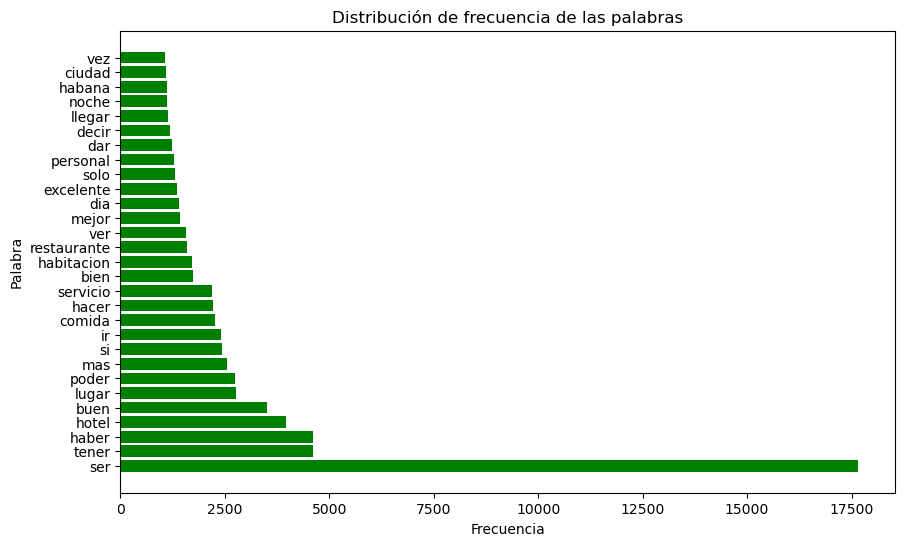

In [30]:
sortedFirst = df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).head(30)

fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst['palabra'], sortedFirst['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

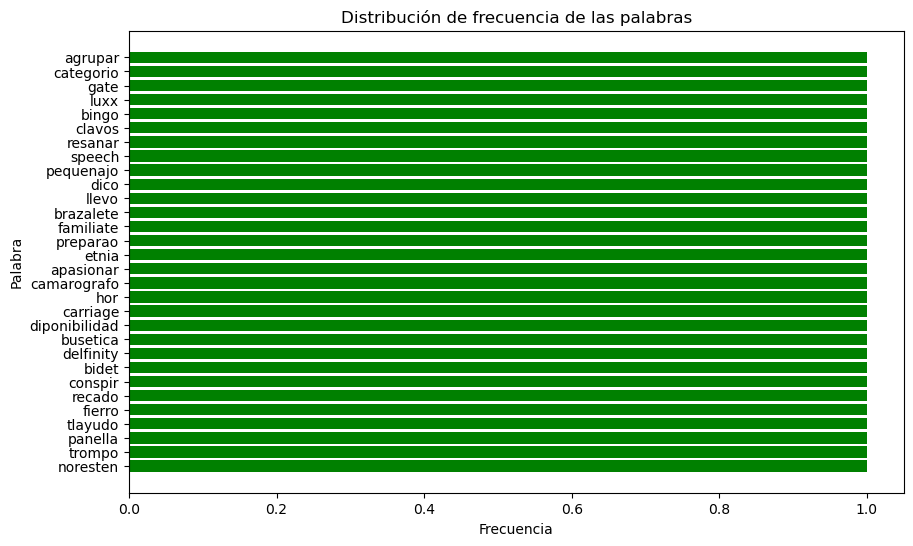

In [31]:
sortedLast= df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).tail(30)

fig2 = plt.figure(figsize=(10, 6))
plt.barh(sortedLast['palabra'], sortedLast['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

#### 3.2 Columna target y texto

In [32]:
x_train_completo, y_train_completo = x_train_completo['tokens'],x_train_completo['Class']
x_train, y_train = x_train['tokens'],x_train['Class']
x_val, y_val = x_val['tokens'],x_val['Class']
x_test, y_test = x_test['tokens'],x_test['Class']

In [33]:
x_train_completo

4425    encanto par ir desayunar domingo familia ser a...
5261    alojar unidad b semana edificio planta bonito ...
1960    realmente restaurante sorprender haber entrar ...
2027    hotel ser hotel viejo instalación deteriorado ...
6658    buen tarde alojar hotel hacer ano encanto regr...
                              ...                        
905     alojar noche alli pared ser fino poder escucha...
5192    dos habitación level habitación impecable ampl...
3980    parecer fiesta inn finsa mantenimiento haber d...
235     visitar hotel encanto calidad servicio comodo ...
5157    impresionante solo haber comprar tiempo show l...
Name: tokens, Length: 4291, dtype: object

## 4. Embedding del texto
Transformación del texto en formato para la máquina

#### 4.1 Count Vectorizer
Utilización del conteo de palabras presentes como Vectorizer -> No creo que sea tan bueno

In [34]:
count = CountVectorizer()
x_train_complete_countVectorizer = count.fit_transform(x_train_completo)
print(x_train_complete_countVectorizer.shape)
x_train_complete_countVectorizer.toarray()[3]

x_train_countVectorizer = count.transform(x_train)
print(x_train_countVectorizer.shape)
x_train_countVectorizer.toarray()[3]


x_val_countVectorizer = count.transform(x_val)
print(x_val_countVectorizer.shape)
x_val_countVectorizer.toarray()[3]


x_test_countVectorizer = count.transform(x_test)
print(x_test_countVectorizer.shape)
x_test_countVectorizer.toarray()[3]

(4291, 11446)
(3218, 11446)
(1073, 11446)
(3511, 11446)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### 4.2 TfiDf

In [35]:
tfidf = TfidfVectorizer()
x_train_completo_tfidfVectorizer = tfidf.fit_transform(x_train_completo)
print(x_train_completo_tfidfVectorizer.shape)
x_train_completo_tfidfVectorizer.toarray()[3]

df_train = pd.DataFrame(x_train_completo_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_train = df_train.sort_values('TF-IDF', ascending=False)
#print(df_train.head(20))



x_train_tfidfVectorizer = tfidf.transform(x_train)
print(x_train_tfidfVectorizer.shape)
x_train_tfidfVectorizer.toarray()[3]

df_train = pd.DataFrame(x_train_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_train = df_train.sort_values('TF-IDF', ascending=False)
#print(df_train.head(20))

x_test_tfidfVectorizer = tfidf.transform(x_test)
print(x_test_tfidfVectorizer.shape)
x_train_tfidfVectorizer.toarray()[3]

df_test = pd.DataFrame(x_test_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_test = df_test.sort_values('TF-IDF', ascending=False)
#print(df_test.head(20))

x_val_tfidfVectorizer = tfidf.transform(x_val)
print(x_val_tfidfVectorizer.shape)
x_train_tfidfVectorizer.toarray()[3]

#print(x_val_tfidfVectorizer[0].T)

df_val = pd.DataFrame(x_val_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_val = df_val.sort_values('TF-IDF', ascending=False)
#print(df_val.head(20))




(4291, 11446)
(3218, 11446)
(3511, 11446)
(1073, 11446)


### 5. Construcción de los modelos

#### 5.1 Naive bayes


In [36]:
from sklearn.naive_bayes import MultinomialNB

# Build a Gaussian Classifier
model = MultinomialNB()

# Model training
model.fit(x_train_complete_countVectorizer, y_train_completo)

# Predict Output
y_pred_test_completo = model.predict(x_test_countVectorizer)

print("Actual Value:", y_test)
print("Predicted Value:", y_pred_test_completo)

Actual Value: 1953    4
4576    5
2217    4
5386    4
4141    4
       ..
1903    4
3780    3
3867    4
7509    5
1524    5
Name: Class, Length: 3511, dtype: int64
Predicted Value: [4 5 5 ... 5 4 5]


In [37]:
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_test_completo))
print("Recall: {}".format(recall_score(y_test,y_pred_test_completo, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_test_completo, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_test_completo, average="macro")))

Exactitud: 0.46
Recall: 0.4128124459711938
Precisión: 0.45957231809299903
Puntuación F1: 0.4198663121331073


In [38]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(x_train_complete_countVectorizer.toarray(), y_train_completo)

# Predict Output
y_pred_test_completo = model.predict(x_test_countVectorizer.toarray())

print("Actual Value:", y_test)
print("Predicted Value:", y_pred_test_completo)

Actual Value: 1953    4
4576    5
2217    4
5386    4
4141    4
       ..
1903    4
3780    3
3867    4
7509    5
1524    5
Name: Class, Length: 3511, dtype: int64
Predicted Value: [2 3 2 ... 3 4 5]


In [39]:
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_test_completo))
print("Recall: {}".format(recall_score(y_test,y_pred_test_completo, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_test_completo, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_test_completo, average="macro")))

Exactitud: 0.27
Recall: 0.2816147138553696
Precisión: 0.28482235789984933
Puntuación F1: 0.2647643999131753


#### 5.2 Support vector machines - Ana Sofía Castellanos


Inicialmente se implementa el algoritmo con algunos hiperparámetros aleatorios, para tener una idea preliminar del rendimiento

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from time import time
# Perform classification with SVM, kernel=linear
classifier_linear = SVC(kernel='linear')
t0 = time()
classifier_linear.fit(x_train_tfidfVectorizer, y_train)
t1 = time()
prediction_linear = classifier_linear.predict(x_test_tfidfVectorizer)
t2 = time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(y_test, prediction_linear, output_dict=True)
print('Class 1: ', report['1'])
print('Class 2: ', report['2'])
print('Class 3: ', report['3'])
print('Class 4: ', report['4'])
print('Class 5: ', report['5'])


Training time: 4.551505s; Prediction time: 4.014897s
Class 1:  {'precision': 0.4878048780487805, 'recall': 0.3582089552238806, 'f1-score': 0.41308089500860584, 'support': 335.0}
Class 2:  {'precision': 0.3788546255506608, 'recall': 0.32209737827715357, 'f1-score': 0.34817813765182193, 'support': 534.0}
Class 3:  {'precision': 0.38169934640522873, 'recall': 0.4306784660766962, 'f1-score': 0.40471240471240466, 'support': 678.0}
Class 4:  {'precision': 0.4177831912302071, 'recall': 0.38669673055242393, 'f1-score': 0.4016393442622951, 'support': 887.0}
Class 5:  {'precision': 0.6081632653061224, 'recall': 0.691736304549675, 'f1-score': 0.6472632493483926, 'support': 1077.0}


[[120 127  51  14  23]
 [ 91 172 174  66  31]
 [ 26 112 292 151  97]
 [  5  33 177 343 329]
 [  4  10  71 247 745]]


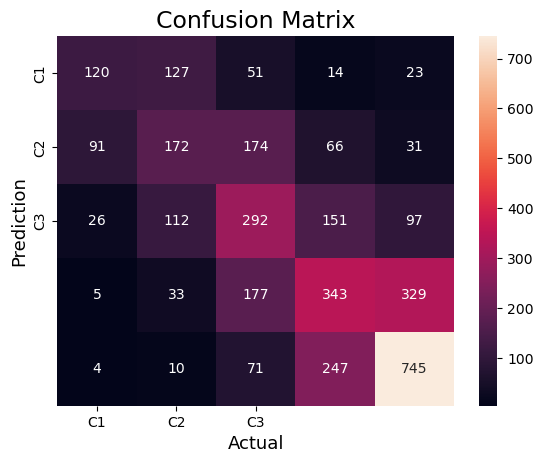

In [41]:
# Matriz de confusión
cm = confusion_matrix(y_test,prediction_linear)
print(cm)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['C1', 'C2', 'C3'],
            yticklabels=['C1', 'C2', 'C3'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [42]:
print('Exactitud: %.2f' % accuracy_score(y_test, prediction_linear))
print("Recall: {}".format(recall_score(y_test,prediction_linear, average="macro")))
print("Precisión: {}".format(precision_score(y_test,prediction_linear, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,prediction_linear, average="macro")))

Exactitud: 0.48
Recall: 0.43788356693596586
Precisión: 0.4548610613081999
Puntuación F1: 0.44297480619670404


##### 5.2.1 Búsqueda de hiperparámetros


In [43]:
#Espacio de busqueda
param_grid = {'C': [0.1,1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001,0.0001], 
              'kernel': ['rbf','linear','poly','sigmoid']}  

##### Dummy grid search
A partir del conjunto de datos de validación se buscan los hipérparametros. Los resultados de esta búsqueda no son para nada buenos ya que se obtienen conmo mejores parametros: [c = 1, g = 1, kernel = 'poly'] y como se observa esto lleva a tener clase 1 y 2 sin precision, ya que no los clasifica. Se comenta el código ya que demora unos 30min en ejecutar


In [44]:
"""best_score= -1000
best_parameters = []
i = 0
for c in param_grid['C']: 
    for g in param_grid['gamma']:
        for k in param_grid['kernel']:
            param = [c,g,k]
            #print('C: ', c, ' Gamma: ', g, ' Kernel: ', k)
            classifier = SVC(C=c, gamma=g, kernel=k)
            classifier.fit(x_val_tfidfVectorizer, y_val)
            score = classifier.score(x_val_tfidfVectorizer, y_val)
            if score> best_score: 
                best_score = score
                best_parameters = [c,g,k]
            print(1/64*i*100, '%'  )
            i+=1



print(best_score,best_parameters)"""

"best_score= -1000\nbest_parameters = []\ni = 0\nfor c in param_grid['C']: \n    for g in param_grid['gamma']:\n        for k in param_grid['kernel']:\n            param = [c,g,k]\n            #print('C: ', c, ' Gamma: ', g, ' Kernel: ', k)\n            classifier = SVC(C=c, gamma=g, kernel=k)\n            classifier.fit(x_val_tfidfVectorizer, y_val)\n            score = classifier.score(x_val_tfidfVectorizer, y_val)\n            if score> best_score: \n                best_score = score\n                best_parameters = [c,g,k]\n            print(1/64*i*100, '%'  )\n            i+=1\n\n\n\nprint(best_score,best_parameters)"

In [45]:
best_parameters = 1,1,'poly'
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# Perform classification with SVM, kernel=linear
classifier_linear = SVC(kernel=best_parameters[2],C=best_parameters[0],gamma=best_parameters[1])
t0 = time()
classifier_linear.fit(x_train_tfidfVectorizer, y_train)
t1 = time()
prediction_linear = classifier_linear.predict(x_test_tfidfVectorizer)
t2 = time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(y_test, prediction_linear, output_dict=True)
print('Class 1: ', report['1'])
print('Class 2: ', report['2'])
print('Class 3: ', report['3'])
print('Class 4: ', report['4'])
print('Class 5: ', report['5'])

Training time: 5.989355s; Prediction time: 3.868033s
Class 1:  {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 335.0}
Class 2:  {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 534.0}
Class 3:  {'precision': 0.2962962962962963, 'recall': 0.02359882005899705, 'f1-score': 0.04371584699453552, 'support': 678.0}
Class 4:  {'precision': 0.4666666666666667, 'recall': 0.007891770011273957, 'f1-score': 0.015521064301552107, 'support': 887.0}
Class 5:  {'precision': 0.31115630447414294, 'recall': 0.9944289693593314, 'f1-score': 0.47399867227262676, 'support': 1077.0}


c:\Users\ascas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ascas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ascas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### K-fold grid search
Dado que el dummy search da pésimos resultados se opta por hacer un k-fold para encontrar los hiperparámetros óptimos. De aquí se encuentra que el mejor parámetro tiene los hiperparámetros: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}. Se deja comentado ya que demora 1h aproximadamente. 


In [46]:
from sklearn.model_selection import KFold 
particiones = KFold(n_splits=3,shuffle=True,random_state=0)

In [47]:
svm = SVC()
best_model = GridSearchCV(svm, param_grid, cv=particiones,verbose = 3)

In [48]:
"""# Ajuste del modelo
best_model.fit(x_train_completo_tfidfVectorizer, y_train_completo)
#El grid search se demora 80 min -> Por este motivo se deja comentado de aqui se sacaron los mejores parametros"""

'# Ajuste del modelo\nbest_model.fit(x_train_completo_tfidfVectorizer, y_train_completo)\n#El grid search se demora 80 min -> Por este motivo se deja comentado de aqui se sacaron los mejores parametros'

In [49]:
"""best_model.best_params_ """

'best_model.best_params_ '

In [50]:
"""svm_final = best_model.best_estimator_"""

'svm_final = best_model.best_estimator_'

In [51]:

svm_final = SVC(C=10,gamma=1,kernel='rbf')
# results
y_pred_train_completo =svm_final.fit(x_train_completo_tfidfVectorizer, y_train_completo)

y_pred_test_completo =  svm_final.predict(x_test_tfidfVectorizer)

report = classification_report(y_test, y_pred_test_completo, output_dict=True)
print('Class 1: ', report['1'])
print('Class 2: ', report['2'])
print('Class 3: ', report['3'])
print('Class 4: ', report['4'])
print('Class 5: ', report['5'])


Class 1:  {'precision': 0.5550239234449761, 'recall': 0.34626865671641793, 'f1-score': 0.42647058823529416, 'support': 335.0}
Class 2:  {'precision': 0.3877118644067797, 'recall': 0.34269662921348315, 'f1-score': 0.363817097415507, 'support': 534.0}
Class 3:  {'precision': 0.37660668380462725, 'recall': 0.43215339233038347, 'f1-score': 0.40247252747252754, 'support': 678.0}
Class 4:  {'precision': 0.42758620689655175, 'recall': 0.41939120631341603, 'f1-score': 0.4234490608992601, 'support': 887.0}
Class 5:  {'precision': 0.6150592216582065, 'recall': 0.6750232126276694, 'f1-score': 0.6436476316954405, 'support': 1077.0}


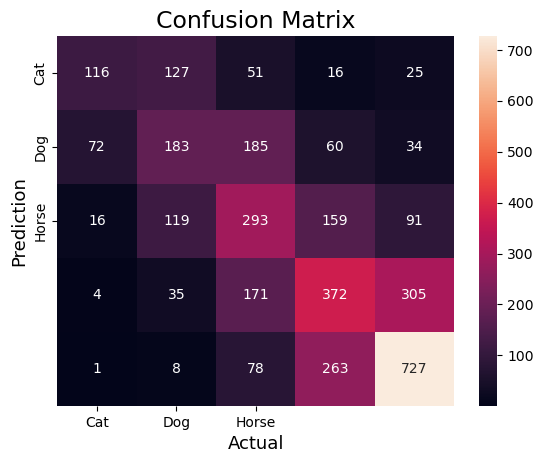

In [52]:
cm = confusion_matrix(y_test, y_pred_test_completo)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Cat', 'Dog', 'Horse'],
            yticklabels=['Cat', 'Dog', 'Horse'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [53]:
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_test_completo))
print("Recall: {}".format(recall_score(y_test,y_pred_test_completo, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_test_completo, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_test_completo, average="macro")))

Exactitud: 0.48
Recall: 0.4431066194402741
Precisión: 0.47239758004222826
Puntuación F1: 0.4519713811436059


#### 5.3 Arbol de decisión - Maria Camila Luna Velasco

In [54]:
from sklearn.tree import DecisionTreeClassifier 
particiones = KFold(n_splits=10, shuffle=True, random_state = 0) 

In [55]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [4, 6, 8, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [None, 'sqrt', 'log2']}


In [56]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(random_state=0)

##### Resultados Count Vectorizer

In [57]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
modelo_count = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
modelo_count.fit(x_train_countVectorizer, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [58]:
modelo_count.best_params_



{'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [59]:
arbol_count = modelo_count.best_estimator_

In [60]:
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_count.predict(x_train_countVectorizer)
y_pred_test = arbol_count.predict(x_test_countVectorizer)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.62
Exactitud sobre test: 0.36


In [61]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.32      0.27      0.30       335
           2       0.31      0.26      0.28       534
           3       0.26      0.22      0.24       678
           4       0.30      0.13      0.18       887
           5       0.42      0.70      0.53      1077

    accuracy                           0.36      3511
   macro avg       0.32      0.32      0.31      3511
weighted avg       0.33      0.36      0.33      3511



In [62]:
# Predecir las etiquetas en el conjunto de validación con CountVectorizer
predicciones_count = modelo_count.predict(x_val_countVectorizer)

# Calcular las métricas con CountVectorizer
exactitud_count = accuracy_score(y_val, predicciones_count)
recall_count = recall_score(y_val, predicciones_count, average='weighted')
precision_count = precision_score(y_val, predicciones_count, average='weighted')
f1_count = f1_score(y_val, predicciones_count, average='weighted')

# Imprimir las métricas con CountVectorizer
print("\nExactitud con CountVectorizer:", exactitud_count)
print("Recall con CountVectorizer:", recall_count)
print("Precision con CountVectorizer:", precision_count)
print("Puntaje F1 con CountVectorizer:", f1_count)



Exactitud con CountVectorizer: 0.36533084808946875
Recall con CountVectorizer: 0.36533084808946875
Precision con CountVectorizer: 0.34891717940872485
Puntaje F1 con CountVectorizer: 0.3276664216598395


#### Resultados tfid Vectorizer

In [63]:
modelo_tfidf = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
modelo_tfidf.fit(x_train_tfidfVectorizer, y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [64]:
modelo_tfidf.best_params_


{'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [65]:
arbol_tfidf = modelo_tfidf.best_estimator_

In [66]:

# Probemos ahora este modelo sobre test.
y_pred_train = arbol_tfidf.predict(x_train_tfidfVectorizer)
y_pred_test = arbol_tfidf.predict(x_test_tfidfVectorizer)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.67
Exactitud sobre test: 0.36


In [67]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.34      0.26      0.30       335
           2       0.33      0.25      0.28       534
           3       0.28      0.18      0.22       678
           4       0.31      0.56      0.40       887
           5       0.52      0.40      0.45      1077

    accuracy                           0.36      3511
   macro avg       0.36      0.33      0.33      3511
weighted avg       0.38      0.36      0.35      3511



In [68]:
# Obtener los nombres de las características utilizadas en el vectorizador TF-IDF
nombres_caracteristicas = tfidf.get_feature_names_out()

# Obtener las importancias de las características del modelo de árbol de decisión
importancia_atributos = modelo_tfidf.best_estimator_.feature_importances_

# Crear un DataFrame de importancias de características
df_importancias = pd.DataFrame({'Palabra': nombres_caracteristicas, 'Importancia': importancia_atributos})

# Ordenar el DataFrame por importancia en orden descendente
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

# Mostrar las primeras 10 filas
print(df_importancias.head(10))



          Palabra  Importancia
4483    excelente     0.048588
9855          ser     0.031324
1571         buen     0.029077
6742         malo     0.027497
10231       sucio     0.027092
6717          mal     0.026547
8261       pesimo     0.022214
5306   habitacion     0.020820
1380         bien     0.019403
2439       comida     0.017859


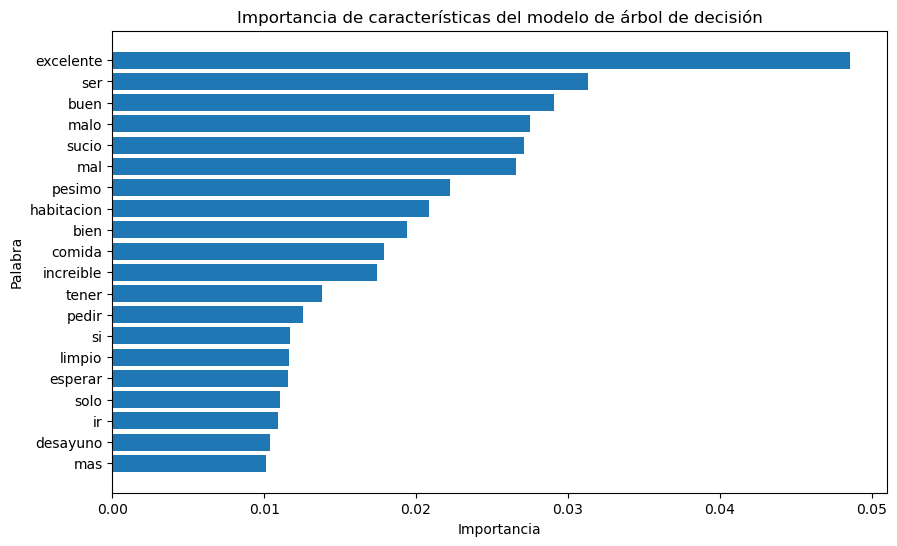

In [69]:
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras horizontal
plt.barh(df_importancias['Palabra'][:20], df_importancias['Importancia'][:20])

# Invertir el eje y para que las características más importantes estén en la parte superior
plt.gca().invert_yaxis()

# Agregar título y etiquetas de los ejes
plt.title('Importancia de características del modelo de árbol de decisión')
plt.xlabel('Importancia')
plt.ylabel('Palabra')

# Mostrar el gráfico
plt.show()


In [70]:
predicciones= modelo_tfidf.predict(x_val_tfidfVectorizer)

In [71]:
# Calcular las métricas
exactitud = accuracy_score(y_val, predicciones)
recall = recall_score(y_val, predicciones, average='weighted')
precision = precision_score(y_val, predicciones, average='weighted')
f1 = f1_score(y_val, predicciones, average='weighted')

# Imprimir las métricas
print("Exactitud:", exactitud)
print("Recall:", recall)
print("Precision:", precision)
print("Puntaje F1:", f1)


Exactitud: 0.37558247903075487
Recall: 0.37558247903075487
Precision: 0.37774119878637025
Puntaje F1: 0.36243385589262334


#### 5.4 Regresión Logística - Juan Manuel Jauregui

In [72]:
from sklearn.linear_model import LogisticRegression

# Se crea el clasificador a partir del algoritmo de regresión logística
logistic_regression = LogisticRegression()

# Se entrena el modelo con los datos de entrenamiento
logistic_regression.fit(x_train_tfidfVectorizer, y_train)

# Se hacen predicciones con el modelo a partir de los datos de prueba
y_pred_tfi = logistic_regression.predict(x_test_tfidfVectorizer)


In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Se crea la matriz de confusión a partir de las predicciones y los datos de prueba
cm = confusion_matrix(y_test, y_pred_tfi)

<Axes: >

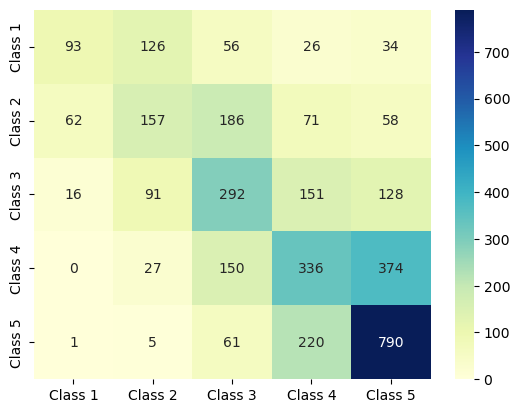

In [74]:
# Se crea un mapa de calor para poder renderizar la matriz de confusión teniendo en cuenta las 5 clases.
cm_matrix = pd.DataFrame(data=cm, 
                          columns=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], 
                          index=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [75]:
# Se imprime el reporte de clasificación
report = classification_report(y_test, y_pred_tfi)
print(report)

              precision    recall  f1-score   support

           1       0.54      0.28      0.37       335
           2       0.39      0.29      0.33       534
           3       0.39      0.43      0.41       678
           4       0.42      0.38      0.40       887
           5       0.57      0.73      0.64      1077

    accuracy                           0.48      3511
   macro avg       0.46      0.42      0.43      3511
weighted avg       0.47      0.48      0.46      3511



In [76]:
# Se imprime la exactitud, precisión, recall y f1-score
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_tfi))
print("Recall: {}".format(recall_score(y_test,y_pred_tfi, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_tfi, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_tfi, average="macro")))

Exactitud: 0.48
Recall: 0.4229243783815493
Precisión: 0.4616126373697413
Puntuación F1: 0.4301440901885174


##### 5.2.1 Búsqueda de hiperparámetros


Se aplican métodos similares a los propuestos en el de SVM para hallar los mejores hiperparámetros

##### Dummy search

In [77]:
# Se crea el clasificador a partir del algoritmo de regresión logística
logistic_regression = LogisticRegression(C=10, solver="lbfgs")

# Se entrena el modelo con los datos de entrenamiento
logistic_regression.fit(x_train_tfidfVectorizer, y_train)

# Se hacen predicciones con el modelo a partir de los datos de prueba
y_pred_tfi = logistic_regression.predict(x_test_tfidfVectorizer)

c:\Users\ascas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
# Se crea la matriz de confusión a partir de las predicciones y los datos de prueba
cm = confusion_matrix(y_test, y_pred_tfi)

<Axes: >

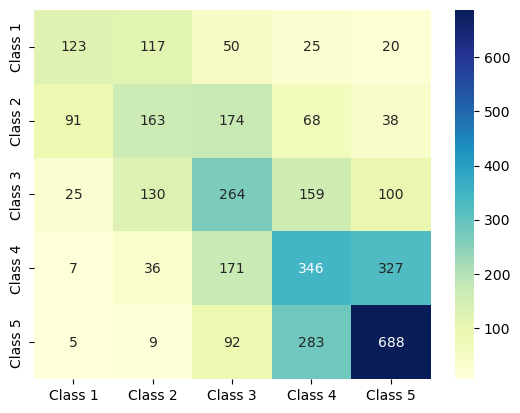

In [79]:
# Se crea un mapa de calor para poder renderizar la matriz de confusión teniendo en cuenta las 5 clases.
cm_matrix = pd.DataFrame(data=cm, 
                          columns=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], 
                          index=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [80]:
# Se imprime el reporte de clasificación
report = classification_report(y_test, y_pred_tfi)
print(report)

              precision    recall  f1-score   support

           1       0.49      0.37      0.42       335
           2       0.36      0.31      0.33       534
           3       0.35      0.39      0.37       678
           4       0.39      0.39      0.39       887
           5       0.59      0.64      0.61      1077

    accuracy                           0.45      3511
   macro avg       0.44      0.42      0.42      3511
weighted avg       0.45      0.45      0.45      3511



In [81]:
# Se imprime la exactitud, precisión, recall y f1-score
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_tfi))
print("Recall: {}".format(recall_score(y_test,y_pred_tfi, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_tfi, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_tfi, average="macro")))

Exactitud: 0.45
Recall: 0.41813571738684996
Precisión: 0.4358157365158652
Puntuación F1: 0.42437370606335234


#### K-fold cross validation

In [82]:
# Se crea el clasificador a partir del algoritmo de regresión logística
logistic_regression = LogisticRegression(C=1, solver="lbfgs")

# Se entrena el modelo con los datos de entrenamiento
logistic_regression.fit(x_train_tfidfVectorizer, y_train)

# Se hacen predicciones con el modelo a partir de los datos de prueba
y_pred_tfi = logistic_regression.predict(x_test_tfidfVectorizer)

In [83]:
# Se crea la matriz de confusión a partir de las predicciones y los datos de prueba
cm = confusion_matrix(y_test, y_pred_tfi)

<Axes: >

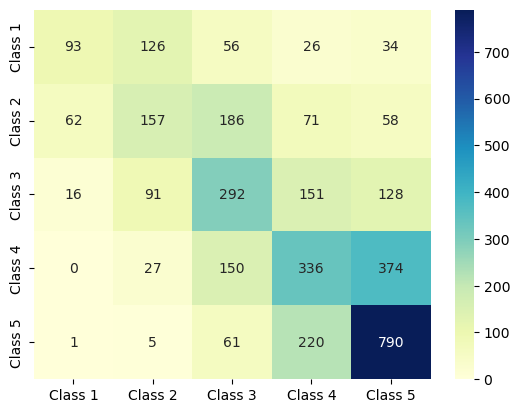

In [84]:
# Se crea un mapa de calor para poder renderizar la matriz de confusión teniendo en cuenta las 5 clases.
cm_matrix = pd.DataFrame(data=cm, 
                          columns=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], 
                          index=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [85]:
# Se imprime el reporte de clasificación
report = classification_report(y_test, y_pred_tfi)
print(report)

              precision    recall  f1-score   support

           1       0.54      0.28      0.37       335
           2       0.39      0.29      0.33       534
           3       0.39      0.43      0.41       678
           4       0.42      0.38      0.40       887
           5       0.57      0.73      0.64      1077

    accuracy                           0.48      3511
   macro avg       0.46      0.42      0.43      3511
weighted avg       0.47      0.48      0.46      3511



In [86]:
# Se imprime la exactitud, precisión, recall y f1-score
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_tfi))
print("Recall: {}".format(recall_score(y_test,y_pred_tfi, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_tfi, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_tfi, average="macro")))

Exactitud: 0.48
Recall: 0.4229243783815493
Precisión: 0.4616126373697413
Puntuación F1: 0.4301440901885174


### 6. Recursos utilizados: 

https://medium.com/escueladeinteligenciaartificial/procesamiento-de-lenguaje-natural-stemming-y-lemmas-f5efd90dca8

https://neptune.ai/blog/vectorization-techniques-in-nlp-guide

https://gitlab.virtual.uniandes.edu.co/ISIS3301/practicas/blob/master/ProcesamientoTextos/Preparaci%C3%B3n_de_textos_estudiante.ipynb
